In [1]:
import os
import json
import lmdb
import pickle

In [29]:
import json

with open(file_path, 'r') as file:
    data = json.load(file)
    
data["worse_energy"]

[{'energy_loss': 69.43992614746094,
  'pred_energy': -0.00045767833944410086,
  'dataset_path': 'datasets/lmdb/alexandria_10_val.lmdb',
  'data_idx': 5}]

In [32]:
data["worse_energy"][0]

{'energy_loss': 69.43992614746094,
 'pred_energy': -0.00045767833944410086,
 'dataset_path': 'datasets/lmdb/alexandria_10_val.lmdb',
 'data_idx': 5}

In [48]:
#Define the function to read JSON files and extract LMDB file paths and indices
def extract_lmdb_info(json_dir):
    lmdb_info = []
    for filename in os.listdir(json_dir):
        if filename.endswith('.json'):
            with open(os.path.join(json_dir, filename), 'r') as file:
                data = json.load(file)
                first_key = list(data.keys())[0]
                first_value = data[first_key]
                lmdb_info.extend(first_value)
    return lmdb_info

In [50]:
def access_lmdb(file_path, index):
    specific_key = str(index).encode('utf-8')
    env = lmdb.open(file_path, subdir=False, readonly=True, lock=False)
    with env.begin() as txn:
        value = txn.get(specific_key)
    
    if value:
        entry = pickle.loads(value)
        attributes_to_print = ['pos', 
                               'cell',
                               'atomic_numbers',
                               'natoms',
                               #'tags',
                               #'edge_index',
                               'cell_offsets',
                               'energy',
                               'forces',
                               #'fixed',
                               #'sid',
                               #'fid'
                              ]
        
        for attr in attributes_to_print:
            if hasattr(entry, attr):
                print(f"{attr}: {getattr(entry, attr)}")
    else:
        print("Key not found")

In [51]:
json_dir = '../datasets/worst_mae/'
lmdb_info = extract_lmdb_info(json_dir)

In [53]:
for info in lmdb_info:
    lmdb_file, index = info
    lmdb_file = "../" + lmdb_file
    print(f"Accessing LMDB file: {lmdb_file} at index: {index}")
    access_lmdb(lmdb_file, index)

Accessing LMDB file: ../datasets/lmdb/alexandria_10_val.lmdb at index: 8
pos: tensor([[1.5828, 1.0461, 2.0761],
        [3.1656, 2.9845, 1.0461],
        [4.7484, 4.0144, 2.9845],
        [3.1656, 2.0761, 4.0144],
        [0.0000, 0.0000, 0.0000]])
cell: tensor([[[ 3.1656e+00,  0.0000e+00,  0.0000e+00],
         [ 1.5828e+00,  5.0606e+00,  1.0000e-08],
         [ 1.5828e+00, -1.0000e-08,  5.0606e+00]]])
atomic_numbers: tensor([42., 42., 42., 42., 40.])
natoms: 5
cell_offsets: tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0],
        [ 0, -1,  0],
        [-1, -1,  0],
        [ 1,  0,  0],
        [ 0,  0,  0],
        [-1,  0,  0],
        [ 0,  0,  1],
        [ 1,  0,  0],
        [-1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0, -1],
        [ 0,  0,  0],
        [-2,  0,  0],
        [-1,  0,  1],
        [ 0, -1,  0],
        [ 1,  0,  1],
        [ 0,  0,  0],
        [-1,  0,  0],
        [ 0,  0,  0],
        [ 1,  0,  0],
        [ 0, 

In [56]:
# Print lmdb_info to check its structure
for info in lmdb_info:
    print(info)

('datasets/lmdb/alexandria_10_val.lmdb', 8)
('datasets/lmdb/alexandria_10_val.lmdb', 6)
('datasets/lmdb/alexandria_10_val.lmdb', 5)


datasets/lmdb/alexandria_10_val.lmdb [8]: Predicted Energy = -9.759152453625575e-05, Actual Energy = -56.257153
datasets/lmdb/alexandria_10_val.lmdb [6]: Predicted Energy = -0.0002388860157225281, Actual Energy = -95.5341
datasets/lmdb/alexandria_10_val.lmdb [5]: Predicted Energy = -0.00045768037671223283, Actual Energy = -201.25188


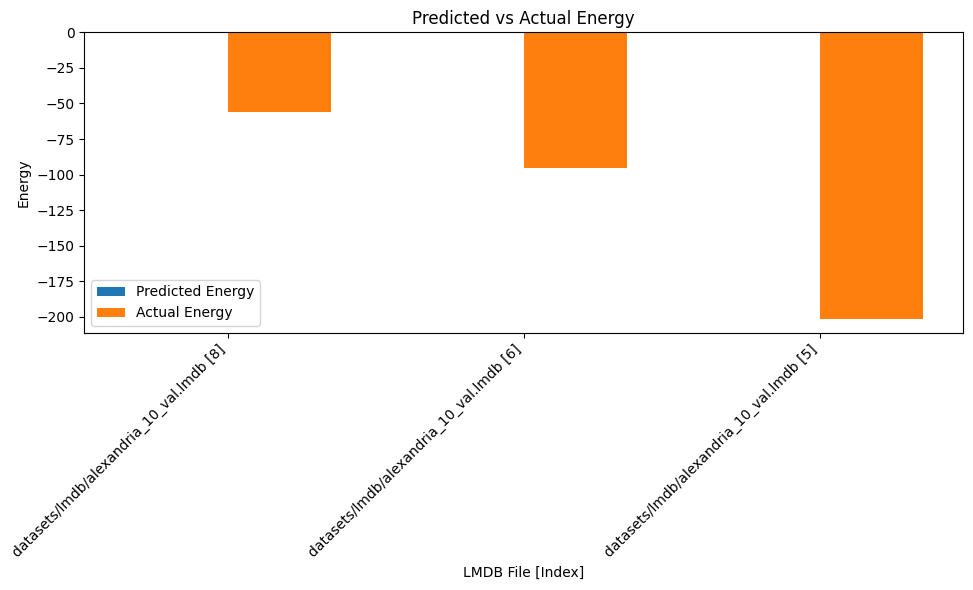

In [59]:
import matplotlib.pyplot as plt

# Generate labels for the bars
labels = [f"{info[0]} [{info[1]}]" for info in lmdb_info]

# Extract predicted energies from the existing lmdb_info
predicted_energies = [info[2] for info in lmdb_info]

# Print the actual and predicted energies for comparison
for label, predicted, actual in zip(labels, predicted_energies, actual_energies):
    print(f"{label}: Predicted Energy = {predicted}, Actual Energy = {actual}")

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(predicted_energies))

bar1 = ax.bar(index, predicted_energies, bar_width, label='Predicted Energy')
bar2 = ax.bar([i + bar_width for i in index], actual_energies, bar_width, label='Actual Energy')

ax.set_xlabel('LMDB File [Index]')
ax.set_ylabel('Energy')
ax.set_title('Predicted vs Actual Energy')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()